# Machine Predictive Maintenance Data

------

## Part 1: Data Exploration  

This is a dataset obtained from the Kaggle dataset repository.  Link to the dataset [**here**](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification).  

This dataset is meant to be used for predictive maintenance, but before going to this part, it will be helpful to understand the dataset by exploring it first.  

**Here are the description of the data obtained from the source:**  

The dataset consists of 10 000 data points stored as rows with 14 features in columns:  
- **UID** & **product ID**: unique identifier ranging from 1 to 10000  
- **Type**: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number  
- **air temperature [K]**: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K  
- **process temperature [K]**: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.  
- **rotational speed [rpm]**: calculated from a power of 2860 W, overlaid with a normally distributed noise  
- **torque [Nm]**: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.  
- **tool wear [min]**: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.  
- **'machine failure'**: Indicates whether the machine has failed in this particular datapoint for any of the following failure modes are true.  

The machine failure consists of five independent failure modes:  
- **tool wear failure (TWF)**: the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).  
- **heat dissipation failure (HDF)**: heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.  
- **power failure (PWF)**: the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.  
- **overstrain failure (OSF)**: if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.  
- **random failures (RNF)**: each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail. 

------

### 1a. Exploration of the Dataset in General

The first thing to do here is to **import the dataset** from a CSV file saved in the local drive.  
After that, some **basic exploration** is done on the dataset, such as checking the data types, number of rows & columns, and if there is any missing value in the dataset. 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from CSV file
df_raw = pd.read_csv("dataset_raw.csv")

In [3]:
# Look at the top 10 rows of the data frame. 
df_raw.head(10)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
5                    1425         41.9               11       0   No Failure  
6                    1558         42.4               14       0   No Failure  
7                    1527         40.2               16       0   No Failure  
8                    1667         28.6               18       0   No Failure  
9                    1741         28.0               21       0   No Failure

In [4]:
# Number of rows & columns in the data frame. 
df_raw.shape

(10000, 10)

In [5]:
# Check if there is any missing value in the dataset. 
df_raw.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
# Data types of each column
df_raw.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

The **UDI** and **Target** columns have a column type of int64 by default (as the values are numeric), but in this case they should be **categorical variables**, as their values are just representation of IDs and states (non-failure and failure) instead of numerical meanings. Therefore, these two columns are casted into string to ease data processings. 

In [7]:
# Casting the two columns to string. 
df_raw["UDI"] = df_raw["UDI"].astype(str)
df_raw["Target"] = df_raw["Target"].astype(str)

The **describe** function can be used to get a summary view of each columns, such as mean, standard deviation, quartiles and number of unique values. 

In [8]:
# Describe function on numeric columns only. 
df_raw.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  10000.000000     10000.000000  
mean      39.986910       107.951000  
std        9.968934        63.654147  
min        3.800000         0.000000  
25%       33.200000        53.000000  
50%       40.100000       108.000000  
75%       46.800000       162.000000  
max       76.600000       253.000000

In [9]:
# Describe function on non-numeric columns. 
df_raw.describe(include = object)

UDI Product ID   Type Target Failure Type
count   10000      10000  10000  10000        10000
unique  10000      10000      3      2            6
top         1     M14860      L      0   No Failure
freq        1          1   6000   9661         9652

Next, a **correlation matrix** is created to show the **Pearson Corrlation Coefficient** between each pair of variables.  
- A value closer to 1 or -1 means that they have a strong positive / neagtive linear relationship, while  
- A value that is close to 0 implies that there is almost no linear relationship.  

However, this may not provide information about relationships that are not linear, so a **scatterplot matrix** is also created to better illustrate the relationships. The scatterplot matrix in the seaborn library comes with **univariate distribution plots**, which shows the data distribution of each variables. 

Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.876107   
Process temperature [K]             0.876107                 1.000000   
Rotational speed [rpm]              0.022670                 0.019277   
Torque [Nm]                        -0.013778                -0.014061   
Tool wear [min]                     0.013853                 0.013488   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                    0.022670    -0.013778         0.013853  
Process temperature [K]                0.019277    -0.014061         0.013488  
Rotational speed [rpm]                 1.000000    -0.875027         0.000223  
Torque [Nm]                           -0.875027     1.000000        -0.003093  
Tool wear [min]                        0.000223    -0.003093         1.000000

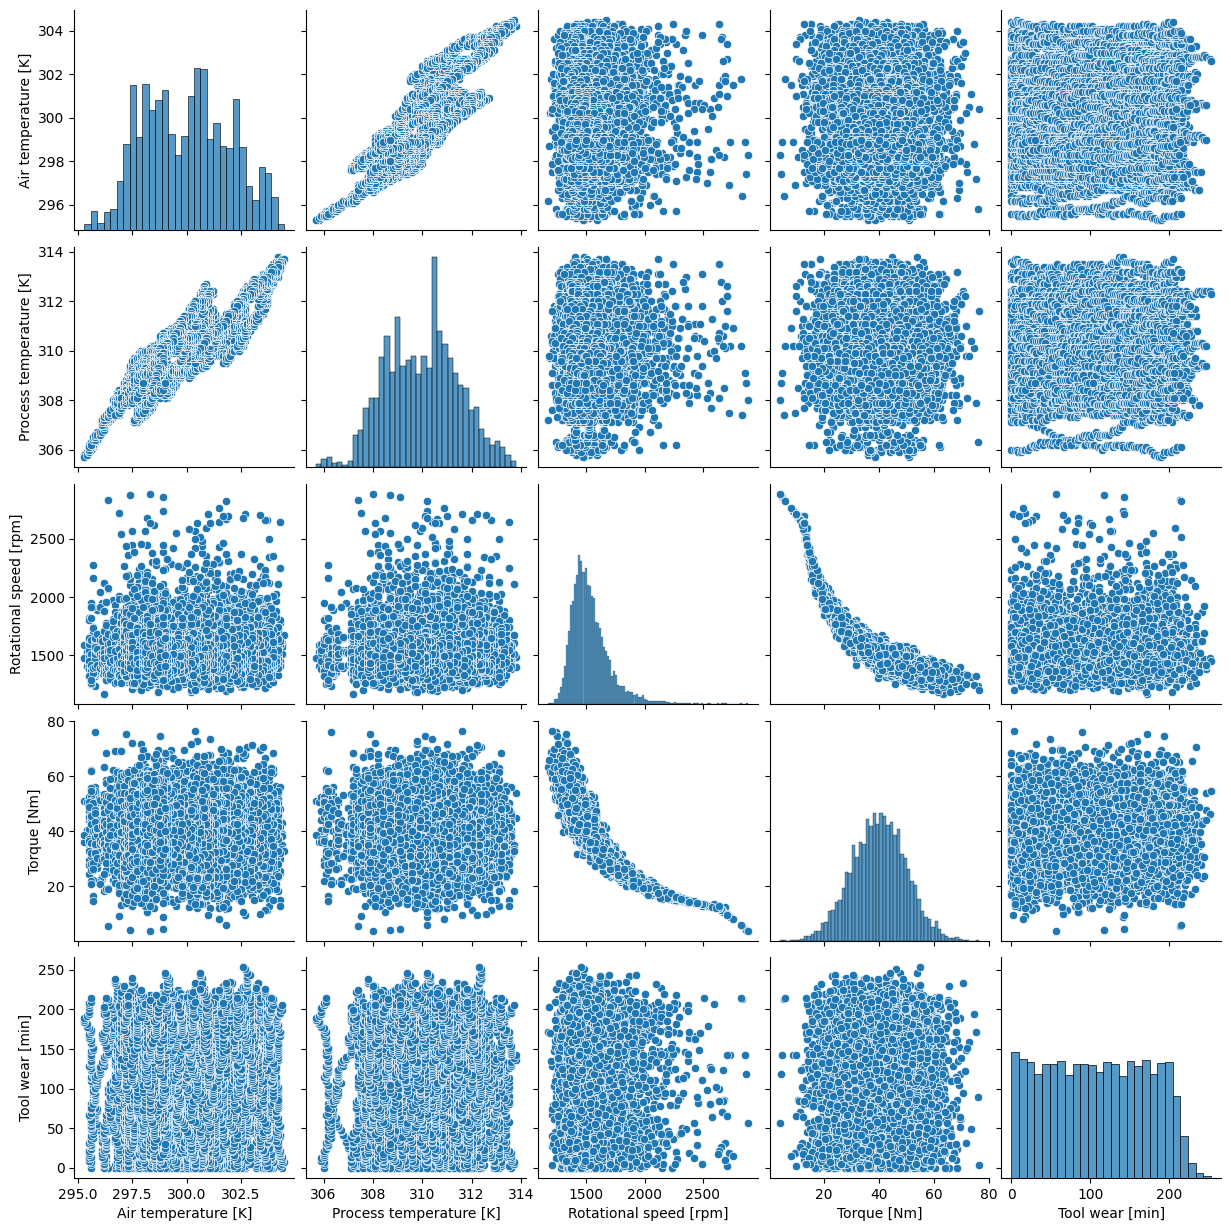

In [10]:
# Correlation matrix & scatterplot matrix - to see if any of the numeric columns are correlated
# Here I only select a few columns where the numeric values are meaningful. 
list_col = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
display(df_raw[list_col].corr())
sns.pairplot(df_raw[list_col])

From the correlation matrix and scatterplot matrix, it can be noticed that:  
- **Air temperature [K]** & **Process temperature [K]** have a strong linear correlation, and
- **Rotational speed [rpm]** & **Torque [Nm]** have a strong correlation that seems slightly non-linear. 

------

### 1b. Exploration on the Target & Failure Type Columns

Number of records by Failure Type columns: 
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


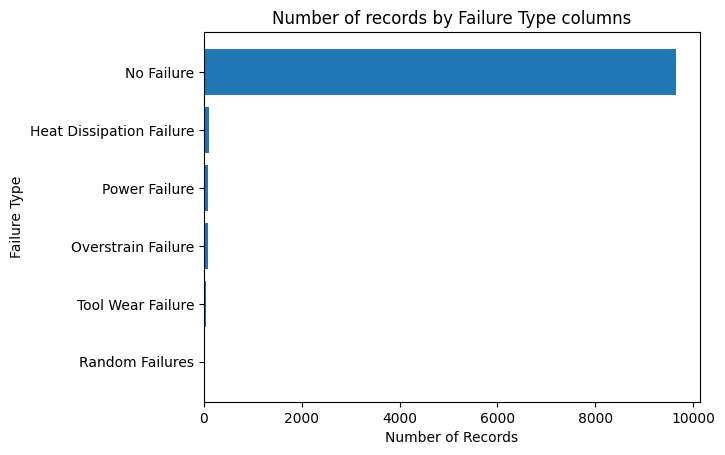

In [25]:
# "Failure Type" columns - number of records
series_count_failtype = df_raw["Failure Type"].value_counts()
print("Number of records by Failure Type columns: ")
print(series_count_failtype)

series_count_failtype = series_count_failtype.sort_values(ascending = True)
plt.barh(y = series_count_failtype.index, 
         width = series_count_failtype.values)
plt.xlabel("Number of Records")
plt.ylabel("Failure Type")
plt.title("Number of records by Failure Type columns")
plt.show()

As the number of **machine failure records are far too less** compared to non-failure records, to reduce confusion, exploration from this point onwards will be focusing more on the Target column (which groups all failure types into one group), and therefore, the Failure Type column will not be used. 

Next, the scatterplot matrix is plotted again, but this time data points for **machine failures are plotted in orange**. This is to observe if these data points have a different distribution. 

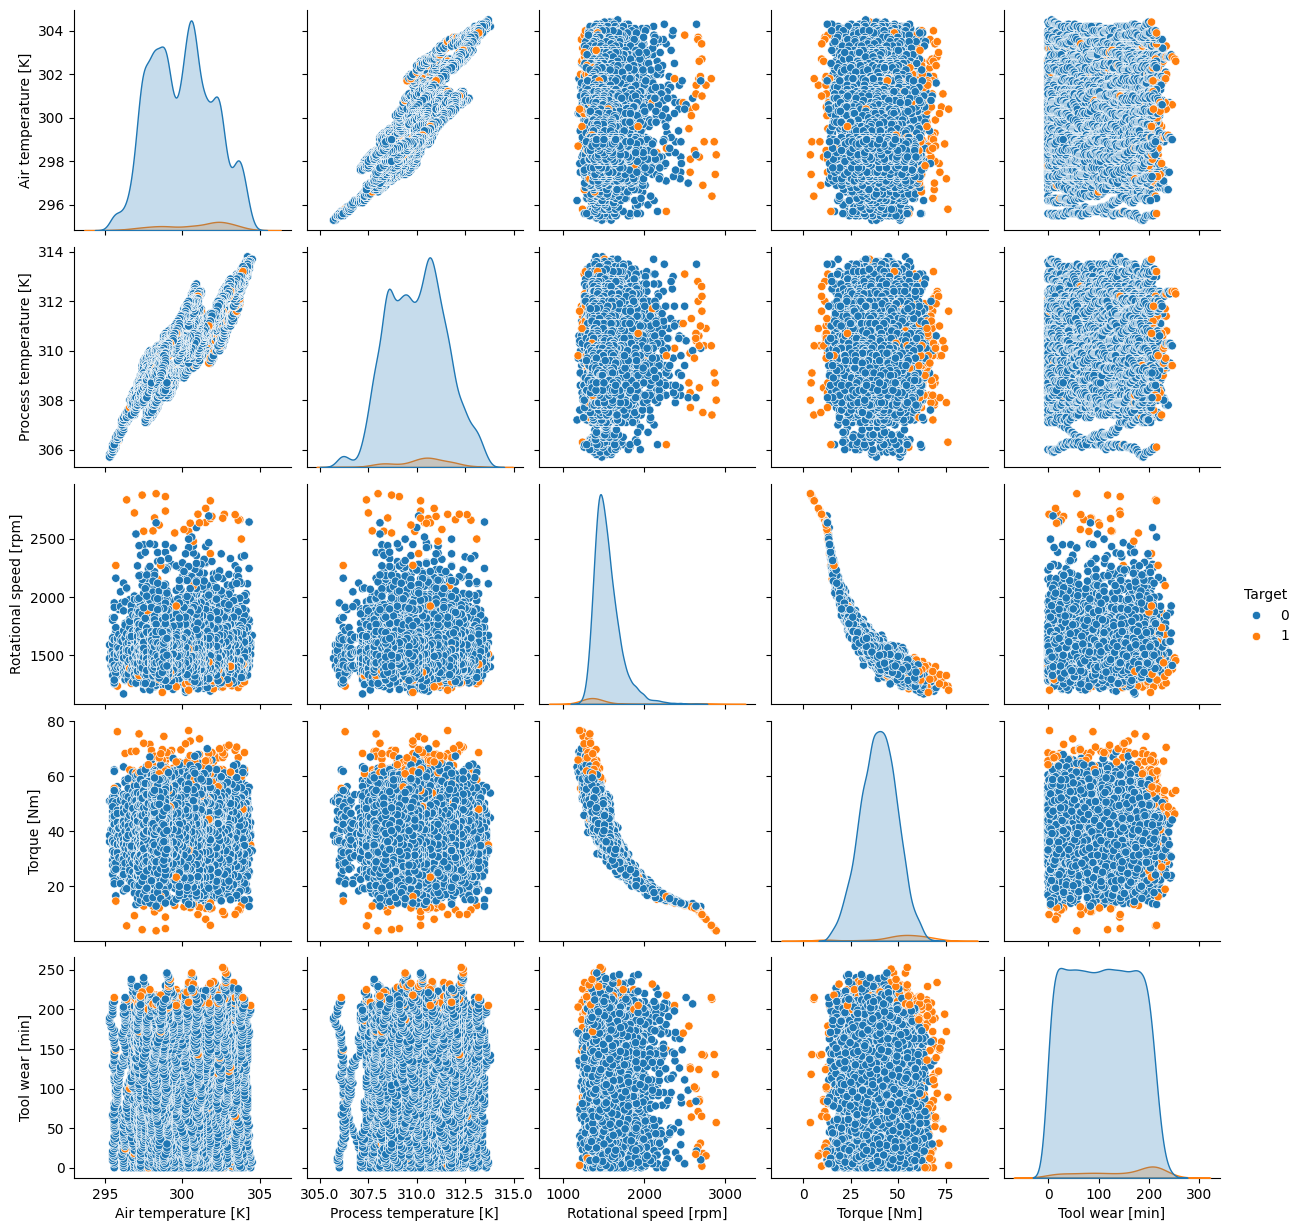

In [26]:
# Plotting the scatterplot matrix again but based on the "Target" column - whether it is a failure or not
list_col = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Target"]
sns.pairplot(df_raw[list_col], hue = "Target")

From the scatterplot matrix, we can see that the data points for machine failures are more concentrated in certain clusters for three of the variables.  
To compare the distributions of the two classes easily, **paired boxplots** are created for the three variables mentioned above. 

<Axes: xlabel='Rotational speed [rpm]', ylabel='Target'>

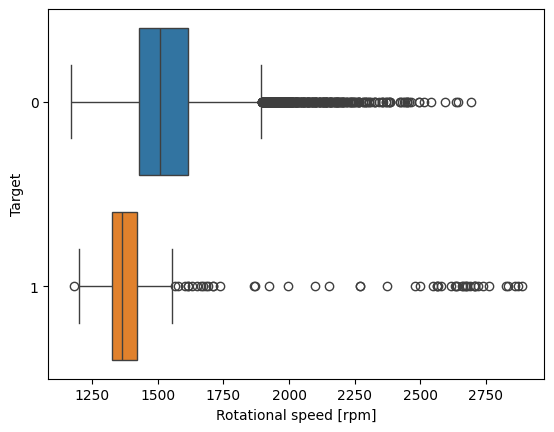

In [27]:
# Boxplot of "Rotational speed [rpm]" by "Target" column
sns.boxplot(data = df_raw, x = "Rotational speed [rpm]", y = "Target", hue = "Target")

<Axes: xlabel='Torque [Nm]', ylabel='Target'>

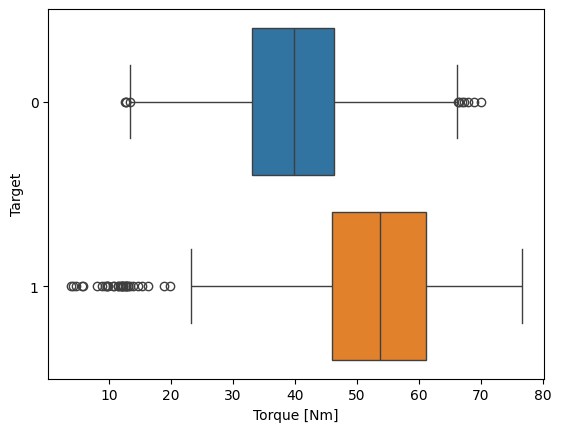

In [28]:
# Boxplot of "Torque [Nm]" by "Target" column
sns.boxplot(data = df_raw, x = "Torque [Nm]", y = "Target", hue = "Target")

<Axes: xlabel='Tool wear [min]', ylabel='Target'>

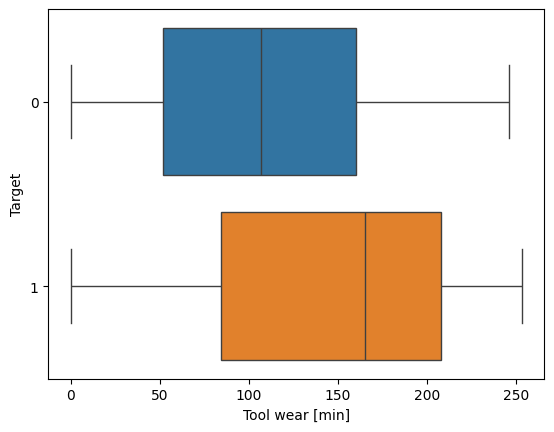

In [29]:
# Boxplot of "Tool wear [min]" by "Target" column
sns.boxplot(data = df_raw, x = "Tool wear [min]", y = "Target", hue = "Target")

From the three boxplots, it can be seen that when most of the machine failure happened,  
- **Rotational speed [rpm]** are at a **lower** range, while
- **Torque [Nm]** and **Tool wear [min]** are at a **higher** range. 

The scatterplot matrix and the boxplots above only showed the relationship between the Target column and numeric columns.  
Other than the numeric columns, there is a categorical column (Type) that may have some relationships with the Target column.  
Here, a **clustered bar chart** is plotted to observe if the number of failure record is higher in any particular product type. 

<Axes: xlabel='Type', ylabel='UDI'>

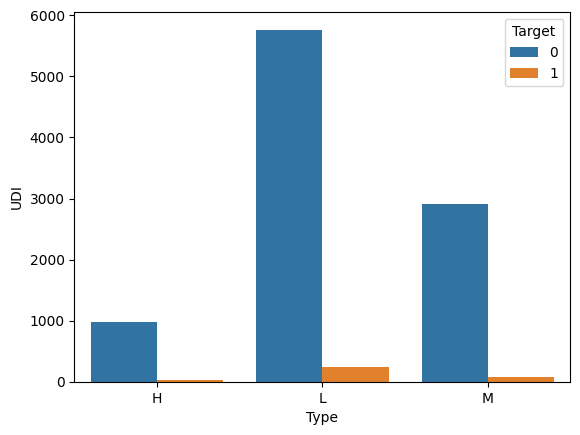

In [39]:
df_groupby = df_raw.groupby(["Type", "Target"]).count()[["UDI"]].reset_index()
sns.barplot(x = "Type", 
            y = "UDI", 
            hue = "Target", 
            data = df_groupby) 

As the number of records for each product Type is quite different, and there are too less failure record, it may be difficult to find out the relationship in this bar chart.  
Therefore, a **summary table** is created below to show the failure rates in **percentages** instead of record count. 

In [65]:
# Split the data frame into two for each Target type and then merge them back. This is to make the record count of each Target Type into two columns. 
df_groupby_0 = df_groupby[df_groupby["Target"] == '0']
df_groupby_1 = df_groupby[df_groupby["Target"] == '1']
df_groupby_merged = df_groupby_0.merge(right = df_groupby_1, 
                                       on = "Type", 
                                       how = "inner",
                                       suffixes = ["_0", "_1"])
df_groupby_merged = df_groupby_merged.drop(columns = ["Target_0", "Target_1"])  # Drop unused columns. 
df_groupby_merged.columns = ["Type", "Count_Non_Failure", "Count_Failure"]  # Just renaming the columns

# Calculate the percentages. 
df_groupby_merged["Count_Total"] = df_groupby_merged["Count_Non_Failure"] + df_groupby_merged["Count_Failure"]
df_groupby_merged["Percentage_Non_Failure"] = df_groupby_merged["Count_Non_Failure"] / df_groupby_merged["Count_Total"]
df_groupby_merged["Percentage_Failure"] = df_groupby_merged["Count_Failure"] / df_groupby_merged["Count_Total"]

# The two percentage columns are in decimal form, convert them into percentage form with 2 decimal places. 
df_groupby_merged_styled = df_groupby_merged.style.format({
    "Percentage_Non_Failure": '{:,.2%}'.format, 
    "Percentage_Failure": '{:,.2%}'.format
})

display(df_groupby_merged_styled)

From the table, it can be seen that:  
- Product **type L** has a slightly **higher failure rate**, and  
- Product **type H** has a slightly **lower failure rate**. 

------

### 1c. Exploration on the "Type" Columns (L, M, H)

Number of records by Type columns: 
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


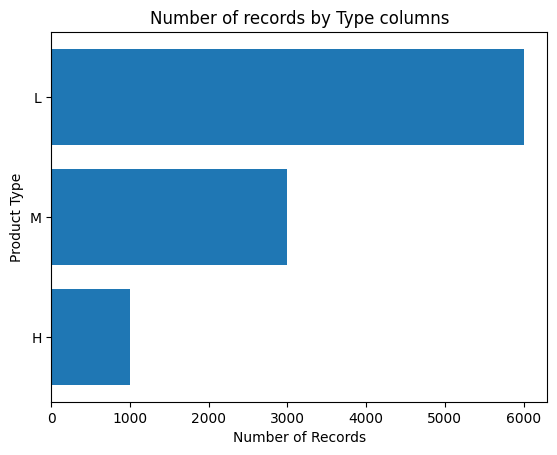

In [70]:
# "Failure Type" columns - number of records
series_count_type = df_raw["Type"].value_counts()
print("Number of records by Type columns: ")
print(series_count_type)

series_count_type = series_count_type.sort_values(ascending = True)
plt.barh(y = series_count_type.index, 
         width = series_count_type.values)
plt.xlabel("Number of Records")
plt.ylabel("Product Type")
plt.title("Number of records by Type columns")
plt.show()

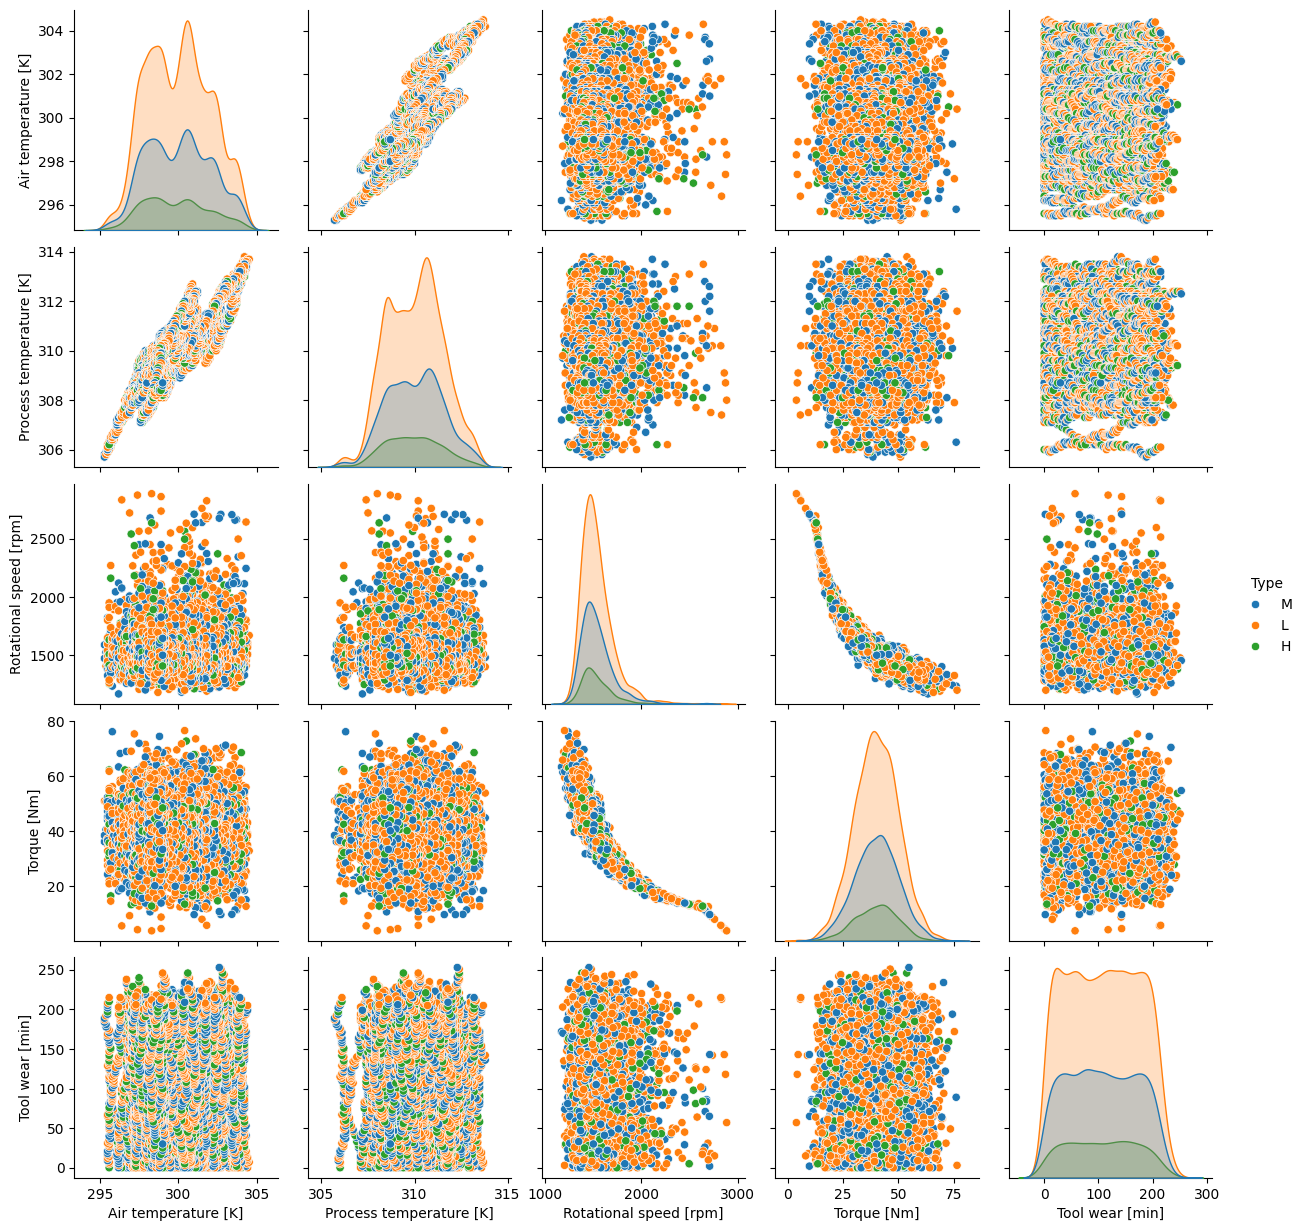

In [71]:
# Plotting the scatterplot matrix again but based on the "Type" column
list_col = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Type"]
sns.pairplot(df_raw[list_col], hue = "Type")

From each of the univariate distribution plots, it can be seen that the distribution of each of the product types are very similar. The boxplot below also proved that this is true for one of the variables. 

<Axes: xlabel='Process temperature [K]', ylabel='Type'>

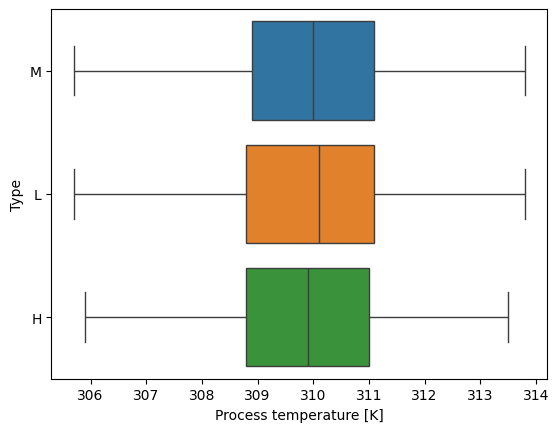

In [38]:
# Boxplot of "Tool wear [min]" by "Type" column
sns.boxplot(data = df_raw, x = "Process temperature [K]", y = "Type", hue = "Type")

------

### Key Takeaways

#### 1. Correlation among the numeric variables 
- **Air temperature [K]** & **Process temperature [K]** have a strong linear correlation, and
- **Rotational speed [rpm]** & **Torque [Nm]** have a strong correlation that seems slightly non-linear. 
#### 2. Correlation between numeric variables & the Target column  
- Most of the machine failure happened when **Rotational speed [rpm]** are at a **lower** range, and when **Torque [Nm]** & **Tool wear [min]** are at a **higher** range. 
#### 3. Failure rate by Product Type  
- Product **type L** has a slightly **higher failure rate**, and  
- Product **type H** has a slightly **lower failure rate**. 

In the next Jupyter Notebook file, some **Machine Learning** models will be trained to predict whether the machine will face failures, based on the other variables in the dataset. 